TUDO COMEÇA COM UM PROBLEMA DE NEGÓCIO: 
# Existe relação entre a área de imóveis (m²) e o valor de aluguel em uma determinada cidade? Se sim, como podemos mensurá-la?

Se o problema é definido incorretamente, todo o projeto é comprometido. 

In [11]:
# Carregando o conjunto de dados, depois de definir o problema de negócio:
# IMPORTS:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.api as sm

# carregando os dados:
df_dsa = pd.read_csv('dataset.csv')
print('SHAPE:\n', df_dsa.shape, '\n')
print('COLUMNS:\n', df_dsa.columns, '\n')
print('HEAD:\n', df_dsa.head(),'\n')
print('INFO:\n', df_dsa.info())

SHAPE:
 (3000, 7) 

COLUMNS:
 Index(['valor_aluguel', 'area_m2', 'ano_construcao', 'codigo_localidade',
       'numero_banheiros', 'numero_cozinhas', 'codigo_bairro'],
      dtype='object') 

HEAD:
    valor_aluguel  area_m2  ano_construcao  codigo_localidade  \
0      120.97436       35            1939                  1   
1      436.97433      104            1939                  1   
2      355.74360       29            1971                  2   
3      282.92310       39            1972                  2   
4      807.23080       97            1985                  1   

   numero_banheiros  numero_cozinhas  codigo_bairro  
0                 0                0           1112  
1                 1                0           1112  
2                 0                0           2114  
3                 0                0           2148  
4                 0                0           2222   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (to

valor_aluguel        0
area_m2              0
ano_construcao       0
codigo_localidade    0
numero_banheiros     0
numero_cozinhas      0
codigo_bairro        0
dtype: int64 

       valor_aluguel      area_m2  ano_construcao  codigo_localidade  \
count    3000.000000  3000.000000     3000.000000        3000.000000   
mean      459.643146    67.363333     1956.321333           1.441000   
std       195.865692    23.675758       22.288136           0.545238   
min        40.512820    20.000000     1918.000000           1.000000   
25%       320.961530    51.000000     1939.000000           1.000000   
50%       426.897435    65.000000     1959.000000           1.000000   
75%       560.282055    81.000000     1972.000000           2.000000   
max      1843.384600   160.000000     1997.000000           3.000000   

       numero_banheiros  numero_cozinhas  codigo_bairro  
count       3000.000000      3000.000000    3000.000000  
mean           0.061333         0.042000    1173.798667  
s

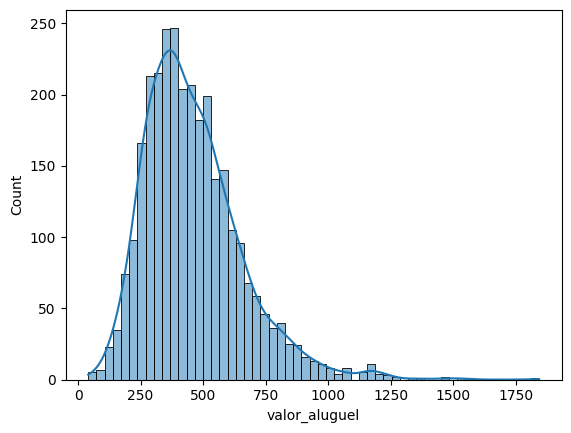

In [29]:
# Análise exploratória: Resumo Estatístico
# verifica se há valores ausentes: - valor ausente é um problema que deve ser resolvido
print(df_dsa.isnull().sum(), '\n')

# resumo estatístico do dataset - Atenção
print(df_dsa.describe(), '\n')

# resumo estatístico de variável alvo
print('Resumo estatístico da variável alvo:\n', df_dsa['valor_aluguel'].describe(), '\n')

# histograma de variável alvo
print('HISTOGRAMA da variável alvo:\n\n', sns.histplot(data = df_dsa, x = 'valor_aluguel', kde = True))


In [31]:
# correlação entre as variáveis
df_dsa.corr()

,valor_aluguel,area_m2,ano_construcao,codigo_localidade,numero_banheiros,numero_cozinhas,codigo_bairro
valor_aluguel,1.000000,0.584878,0.139194,0.172368,0.250261,0.170707,-0.020846
area_m2,0.584878,1.000000,-0.226581,0.110046,0.226306,0.045716,-0.089050
ano_construcao,0.139194,-0.226581,1.000000,-0.152206,0.065824,0.109881,0.327983
codigo_localidade,0.172368,0.110046,-0.152206,1.000000,0.037858,-0.004774,-0.282528
numero_banheiros,0.250261,0.226306,0.065824,0.037858,1.000000,0.064216,0.043600
numero_cozinhas,0.170707,0.045716,0.109881,-0.004774,0.064216,1.000000,0.029495
codigo_bairro,-0.020846,-0.089050,0.327983,-0.282528,0.043600,0.029495,1.000000


<Axes: xlabel='area_m2', ylabel='valor_aluguel'>

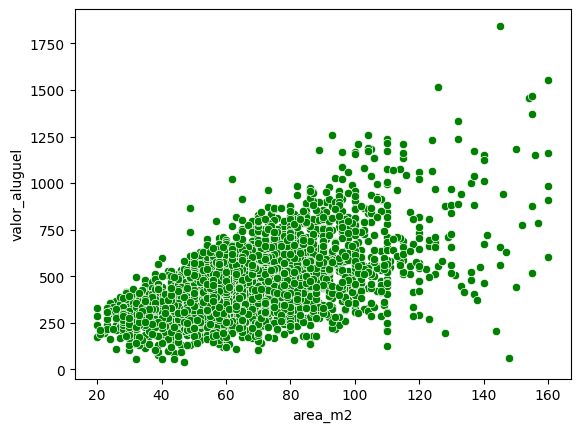

In [33]:
# vamos analisar a relação entre a variável de entrada e a variável alvo valor_aluguel
sns.scatterplot(data = df_dsa, x = 'area_m2', y = 'valor_aluguel', color = 'green')

# Regressão linear simples:
Regressão linear é uma técnica utilizada para modelar a relação entre uma variável dependente e uma ou mais variáveis independentes. A regressão linear tem como objetivo estimar os coefiientes da equação que melhor descreve essa relação, minimizando a soma dos erros quadráticos entre os valores observados e os valores pelo modelo. 

In [35]:
# Construção do Modelo OLS (Ordinary Least Squares) com Statsmodels em Python
df_dsa.head()

,valor_aluguel,area_m2,ano_construcao,codigo_localidade,numero_banheiros,numero_cozinhas,codigo_bairro
0,120.97436,35,1939,1,0,0,1112
1,436.97433,104,1939,1,1,0,1112
2,355.74360,29,1971,2,0,0,2114
3,282.92310,39,1972,2,0,0,2148
4,807.23080,97,1985,1,0,0,2222


In [39]:
# definindo a variável dependente:
Y = df_dsa['valor_aluguel']

# definindo a variável independente:
X = df_dsa['area_m2']

# o Statsmodels requer a adição de uma constante à variável independente
X = sm.add_constant(X)

# criamos o modelo
modelo = sm.OLS(Y, X) # y antes de x

In [40]:
# treinamento do modelo
resultado = modelo.fit()
print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:          valor_aluguel   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     1559.
Date:                Sun, 03 Mar 2024   Prob (F-statistic):          6.84e-275
Time:                        13:41:05   Log-Likelihood:                -19461.
No. Observations:                3000   AIC:                         3.893e+04
Df Residuals:                    2998   BIC:                         3.894e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        133.6988      8.750     15.279      0.0

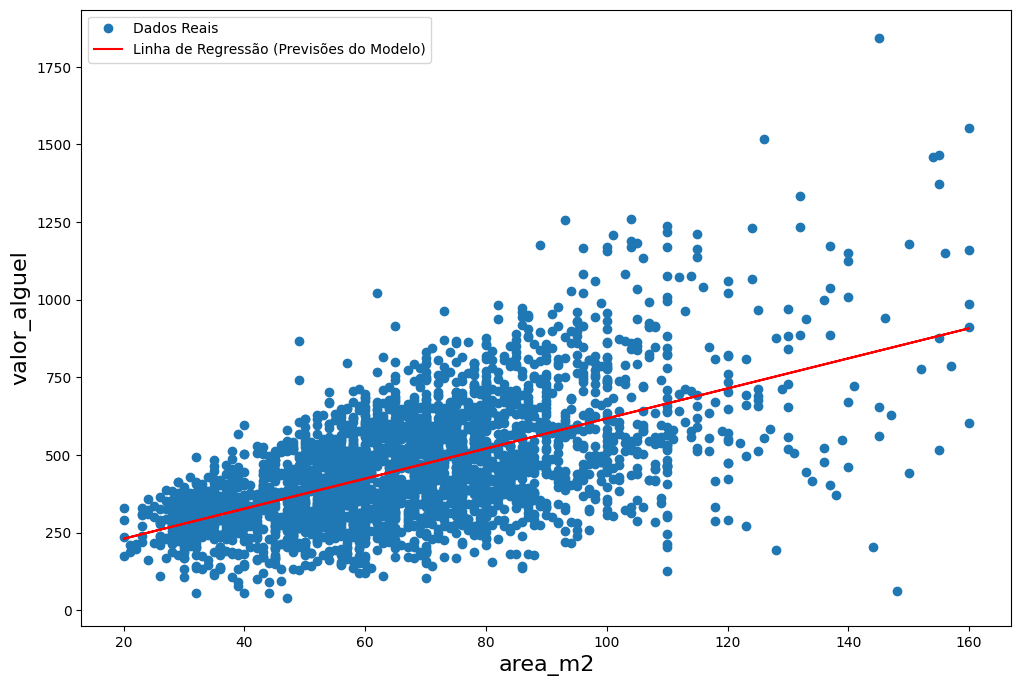

In [41]:
# plot
plt.figure(figsize = (12, 8))
plt.xlabel('area_m2', size = 16)
plt.ylabel('valor_alguel', size = 16)
plt.plot(X['area_m2'], y, 'o', label = 'Dados Reais')
plt.plot(X['area_m2'], resultado.fittedvalues, 'r', label = 'Linha de Regressão (Previsões do Modelo)')
plt.legend(loc = 'best')
plt.show()

# Conclusão:
Claramente existe uma forte relação entre a área (em m2) dos imóveis e o valor do aluguel. Entretanto, apenas a área dos imóveis não é suficiente para explicar a variação no valor do aluguel, pois nosso modelo obteve um coeficiente de determinação (R²) de apenas 0.34.

O ideal seria usar mais variáveis de entrada para construir o modelo a fim de compreender se outros fatores influenciam no valor do aluguel.

É sempre importante deixar claro que correlação não implica causalidade e que não podemos afirmar que o valor do aluguel muda apenas devido à área dos imóveis. Para estudar causalidade devemos aplicar Análise Causal.
